In [4]:
%reset -f

In [6]:
# exercise 1.5.1
import importlib_resources
import numpy as np
import pandas as pd

# Load the dataset file using pandas
df = pd.read_csv("HeartDisease.csv")

raw_data = df.values

#print(df)

# We start by making the data matrix X by indexing into data.
# We know that the attributes are stored in the columns from inspecting
# the file.
cols = range(0, 9)
X = raw_data[:, cols]

#print(X)

# We can extract the attribute names that came from the header of the csv
attributeNames = np.asarray(df.columns[cols])

#print(attributeNames)

# Before we can store the class index, we need to convert the strings that
# specify the class of a given object to a numerical value. We start by
# extracting the strings for each sample from the raw data loaded from the csv:
classLabels = raw_data[:, -1]  # -1 takes the last column

#print (classLabels)
# Then determine which classes are in the data by finding the set of
# unique class labels
classNames = np.unique(classLabels)


# We can assign each type of Iris class with a number by making a
# Python dictionary as so:

classDict = dict(zip(classNames, range(len(classNames))))
#print(classDict)

# The function zip simply "zips" togetter the classNames with an integer,
# like a zipper on a jacket.
# For instance, you could zip a list ['A', 'B', 'C'] with ['D', 'E', 'F'] to
# get the pairs ('A','D'), ('B', 'E'), and ('C', 'F').
# A Python dictionary is a data object that stores pairs of a key with a value.
# This means that when you call a dictionary with a given key, you
# get the stored corresponding value. Try highlighting classDict and press F9.
# You'll see that the first (key, value)-pair is ('Iris-setosa', 0).
# If you look up in the dictionary classDict with the value 'Iris-setosa',
# you will get the value 0. Try it with classDict['Iris-setosa']

# With the dictionary, we can look up each data objects class label (the string)
# in the dictionary, and determine which numerical value that object is
# assigned. This is the class index vector y:

y = np.array([classDict[cl] for cl in classLabels])

# In the above, we have used the concept of "list comprehension", which
# is a compact way of performing some operations on a list or array.
# You could read the line  "For each class label (cl) in the array of
# class labels (classLabels), use the class label (cl) as the key and look up
# in the class dictionary (classDict). Store the result for each class label
# as an element in a list (because of the brackets []). Finally, convert the
# list to a numpy array".
# Try running this to get a feel for the operation:
# list = [0,1,2]
# new_list = [element+10 for element in list]

# We can determine the number of data objects and number of attributes using
# the shape of X
N, M = X.shape

# Finally, the last variable that we need to have the dataset in the
# "standard representation" for the course, is the number of classes, C:
C = len(classNames)


In [18]:
### STANDARDIZE

for  i in range (0, 9):
    X[:, i] = (X[:, i] - np.mean(X[:, i]))/np.var(X[:, i])

In [21]:
from matplotlib.pylab import figure, legend, plot, show, xlabel, ylabel, ylim
import sklearn.linear_model as lm

model = lm.LogisticRegression()
model = model.fit(X, y)

c:\Users\mario\anaconda3\envs\imldm\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
y_est = model.predict(X)
y_est_white_prob = model.predict_proba(X)[:, 0]

In [5]:
misclass_rate = np.sum(y_est != y) / float(len(y_est))

# Display classification results
print("\nOverall misclassification rate: {0:.3f}".format(misclass_rate))


Overall misclassification rate: 0.255


BASELINE

In [4]:
y_est_baseline = np.full((y.size), np.bincount(y).argmax())
misclass_rate_baseline = np.sum(y_est_baseline != y) / float(len(y_est_baseline))

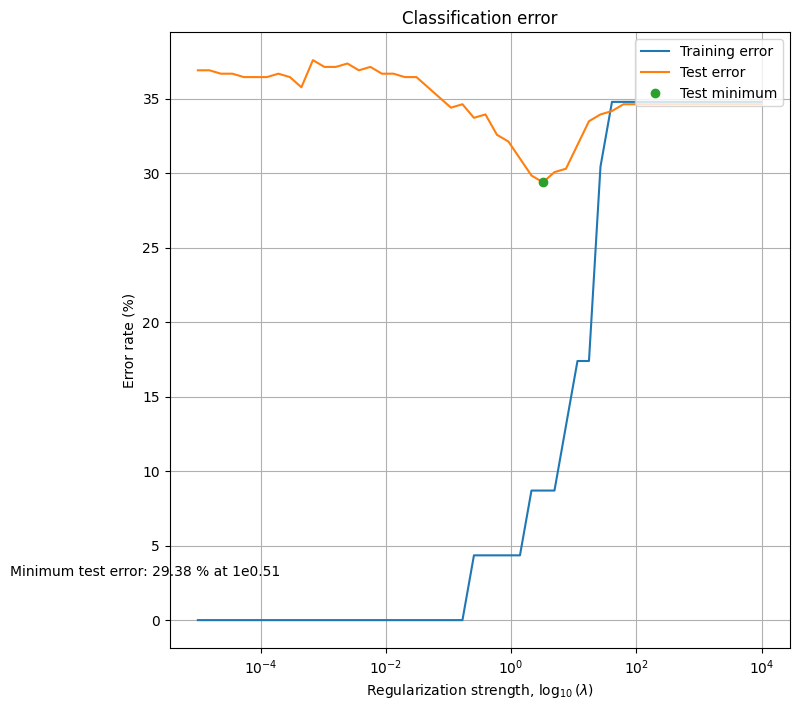

[1.00000000e-05 1.52641797e-05 2.32995181e-05 3.55648031e-05
 5.42867544e-05 8.28642773e-05 1.26485522e-04 1.93069773e-04
 2.94705170e-04 4.49843267e-04 6.86648845e-04 1.04811313e-03
 1.59985872e-03 2.44205309e-03 3.72759372e-03 5.68986603e-03
 8.68511374e-03 1.32571137e-02 2.02358965e-02 3.08884360e-02
 4.71486636e-02 7.19685673e-02 1.09854114e-01 1.67683294e-01
 2.55954792e-01 3.90693994e-01 5.96362332e-01 9.10298178e-01
 1.38949549e+00 2.12095089e+00 3.23745754e+00 4.94171336e+00
 7.54312006e+00 1.15139540e+01 1.75751062e+01 2.68269580e+01
 4.09491506e+01 6.25055193e+01 9.54095476e+01 1.45634848e+02
 2.22299648e+02 3.39322177e+02 5.17947468e+02 7.90604321e+02
 1.20679264e+03 1.84206997e+03 2.81176870e+03 4.29193426e+03
 6.55128557e+03 1.00000000e+04]
[0.3690205  0.3690205  0.3667426  0.3667426  0.36446469 0.36446469
 0.36446469 0.3667426  0.36446469 0.35763098 0.37585421 0.37129841
 0.37129841 0.37357631 0.3690205  0.37129841 0.3667426  0.3667426
 0.36446469 0.36446469 0.35763098 0.

: 

In [14]:
# exercise 8.1.2

import importlib_resources
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from dtuimldmtools import confmatplot, rocplot
# Create crossvalidation partition for evaluation
# using stratification and 95 pct. split between training and test
K = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, stratify=y)
# Try to change the test_size to e.g. 50 % and 99 % - how does that change the
# effect of regularization? How does differetn runs of  test_size=.99 compare
# to eachother?

# Standardize the training and set set based on training set mean and std
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

# Fit regularized logistic regression model to training data to predict
# the type of wine
lambda_interval = np.logspace(-5, 4, 50)
train_error_rate = np.zeros(len(lambda_interval))
test_error_rate = np.zeros(len(lambda_interval))
coefficient_norm = np.zeros(len(lambda_interval))
for k in range(0, len(lambda_interval)):
    mdl = LogisticRegression(penalty="l2", C=1 / lambda_interval[k])

    mdl.fit(X_train, y_train)

    y_train_est = mdl.predict(X_train).T
    y_test_est = mdl.predict(X_test).T

    train_error_rate[k] = np.sum(y_train_est != y_train) / len(y_train)
    test_error_rate[k] = np.sum(y_test_est != y_test) / len(y_test)

    w_est = mdl.coef_[0]
    coefficient_norm[k] = np.sqrt(np.sum(w_est**2))

min_error = np.min(test_error_rate)
opt_lambda_idx = np.argmin(test_error_rate)
opt_lambda = lambda_interval[opt_lambda_idx]

plt.figure(figsize=(8, 8))
# plt.plot(np.log10(lambda_interval), train_error_rate*100)
# plt.plot(np.log10(lambda_interval), test_error_rate*100)
# plt.plot(np.log10(opt_lambda), min_error*100, 'o')
plt.semilogx(lambda_interval, train_error_rate * 100)
plt.semilogx(lambda_interval, test_error_rate * 100)
plt.semilogx(opt_lambda, min_error * 100, "o")
plt.text(
    1e-8,
    3,
    "Minimum test error: "
    + str(np.round(min_error * 100, 2))
    + " % at 1e"
    + str(np.round(np.log10(opt_lambda), 2)),
)
plt.xlabel("Regularization strength, $\log_{10}(\lambda)$")
plt.ylabel("Error rate (%)")
plt.title("Classification error")
plt.legend(["Training error", "Test error", "Test minimum"], loc="upper right")

plt.grid()
plt.show()



print(lambda_interval)
print(test_error_rate)